In [1]:
## Package setup
import grama as gr
import plotnine as pt
import pandas as pd
X = gr.Intention()

/home/zach/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Setup

---

Load trajectory data

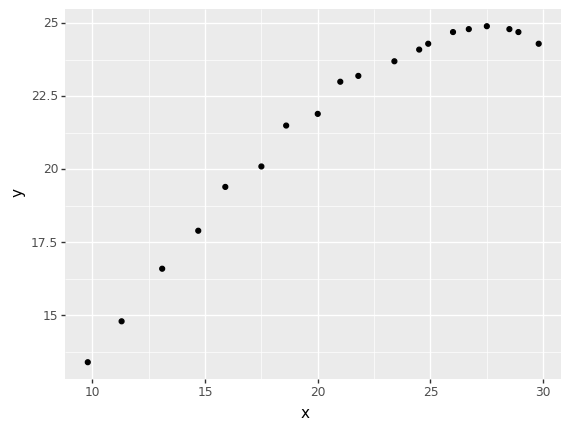

<ggplot: (8783462911289)>

In [2]:
from grama.data import df_trajectory_windowed

(
    pt.ggplot(df_trajectory_windowed, pt.aes("x", "y"))
    + pt.geom_point()
)

Load a trajectory model to fit


In [3]:
from grama.models import make_trajectory_linear
md_trajectory = make_trajectory_linear()
md_trajectory.printpretty()

model: Trajectory Model

  inputs:
    var_det:
      t: (unbounded)
      tau: [0.05, inf]
      v0: [0.1, inf]
      u0: [0.1, inf]
    var_rand:
    copula:
        None
  functions:
    x_trajectory: ['u0', 'v0', 'tau', 't'] -> ['x']
    y_trajectory: ['u0', 'v0', 'tau', 't'] -> ['y']


Fit trajectory model to data


In [4]:
md_fit = (
    df_trajectory_windowed
    >> gr.ft_nls(
        md=md_trajectory,
        method="SLSQP",
        uq_method="linpool",
    )
)

... fit_nls setting out = ['y', 'x']
... eval_nls setting out = ['y', 'x']
... eval_nls setting var_fix = []
... eval_nls setting var_feat = ['t']


        tau         v0         u0  tau_0  v0_0  u0_0  success  \
0  2.802238  28.234827  18.792194   0.05   0.1   0.1     True   

                                 message  n_iter       mse  
0  Optimization terminated successfully.      45  0.093358  
... provided columns intersect model output.
eval_df() is dropping {'y', 'x'}


## Assess model


... provided columns intersect model output.
eval_df() is dropping {'y', 'x'}


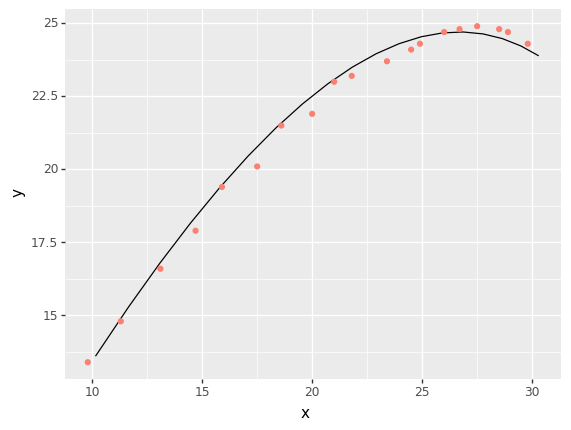

<ggplot: (8783539799753)>

In [5]:
# Nominal curve
df_nom = (
    md_fit
    >> gr.ev_nominal(df_det=df_trajectory_windowed)
)

(
    pt.ggplot(mapping=pt.aes("x", "y"))
    + pt.geom_line(data=df_nom)
    + pt.geom_point(data=df_trajectory_windowed, color="salmon")
)

## Assess model with error bars

... provided columns intersect model output.
eval_df() is dropping {'y', 'x'}


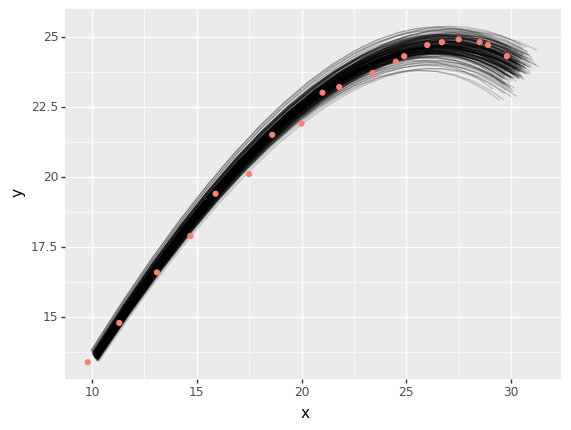

<ggplot: (8783446041813)>

In [6]:
# Nominal curve
df_lines = (
    md_fit
    >> gr.ev_monte_carlo(n=200, df_det=df_trajectory_windowed)
)

(
    pt.ggplot(mapping=pt.aes("x", "y"))
    + pt.geom_line(data=df_lines, mapping=pt.aes(group="u0"), alpha=1/5)
    + pt.geom_point(data=df_trajectory_windowed, color="salmon")
)